# Exploratory Data Analysis (EDA) - Retail Dataset

In [1]:

# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)
plt.style.use("seaborn-v0_8")


In [2]:

# Load Dataset
df = pd.read_csv("retail_sales_dataset.csv")

# Convert date column
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.dropna(subset=["Date"]).copy()

#Data Cleaning & Preparation 
# Create new time features
df["Month_Year"] = df["Date"].dt.to_period("M").astype(str)
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

# Create Age Groups
bins = [0, 19, 29, 39, 49, 59, 200]
labels = ["<20", "20-29", "30-39", "40-49", "50-59", "60+"]
df["Age Group"] = pd.cut(df["Age"], bins=bins, labels=labels, include_lowest=True, right=True)

print("Data Shape:", df.shape)
print("Missing Values:\n", df.isna().sum())


Data Shape: (1000, 13)
Missing Values:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
Month_Year          0
Year                0
Month               0
Age Group           0
dtype: int64


,Product Category,total_revenue,total_quantity,orders,unique_customers,avg_price,AOV
0,Beauty,143515,771,307,307,184.055375,467.475570
1,Clothing,155580,894,351,351,174.287749,443.247863
2,Electronics,156905,849,342,342,181.900585,458.786550


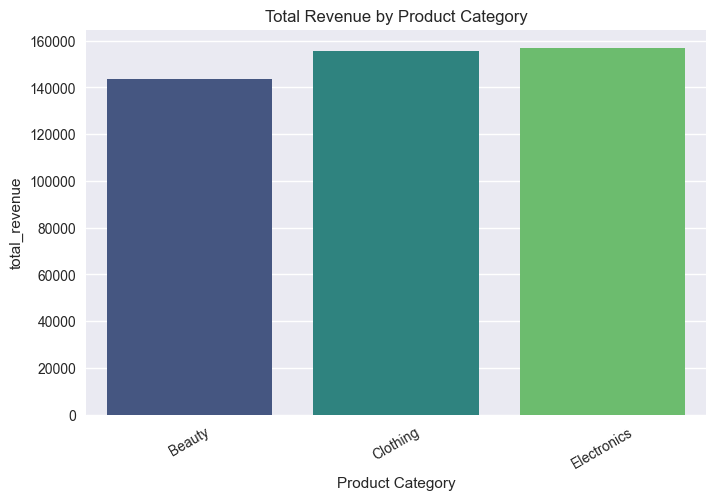

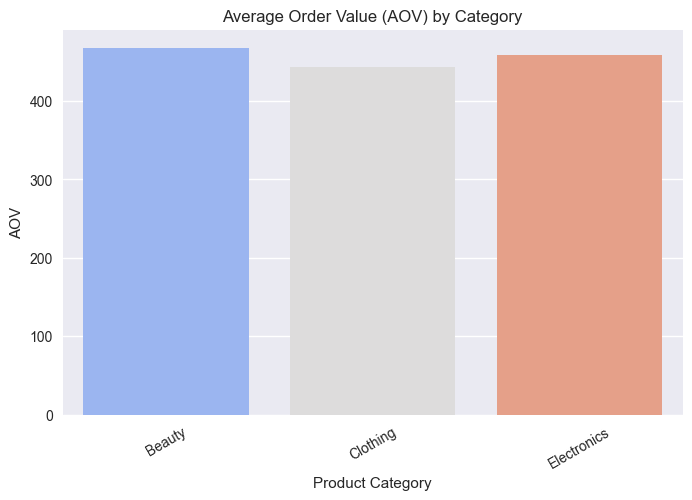

In [3]:

#Category Summary 
category_summary = (
    df.groupby("Product Category")
      .agg(
          total_revenue=("Total Amount", "sum"),
          total_quantity=("Quantity", "sum"),
          orders=("Transaction ID", "count"),
          unique_customers=("Customer ID", "nunique"),
          avg_price=("Price per Unit", "mean")
      )
      .reset_index()
)
category_summary["AOV"] = category_summary["total_revenue"] / category_summary["orders"]
display(category_summary)

# Plot: Revenue by Category
plt.figure(figsize=(8,5))
sns.barplot(x="Product Category", y="total_revenue", data=category_summary,
            hue="Product Category", dodge=False, legend=False, palette="viridis")
plt.title("Total Revenue by Product Category")
plt.xticks(rotation=30)
plt.show()

# Plot: AOV by Category
plt.figure(figsize=(8,5))
sns.barplot(x="Product Category", y="AOV", data=category_summary,
            hue="Product Category", dodge=False, legend=False, palette="coolwarm")
plt.title("Average Order Value (AOV) by Category")
plt.xticks(rotation=30)
plt.show()


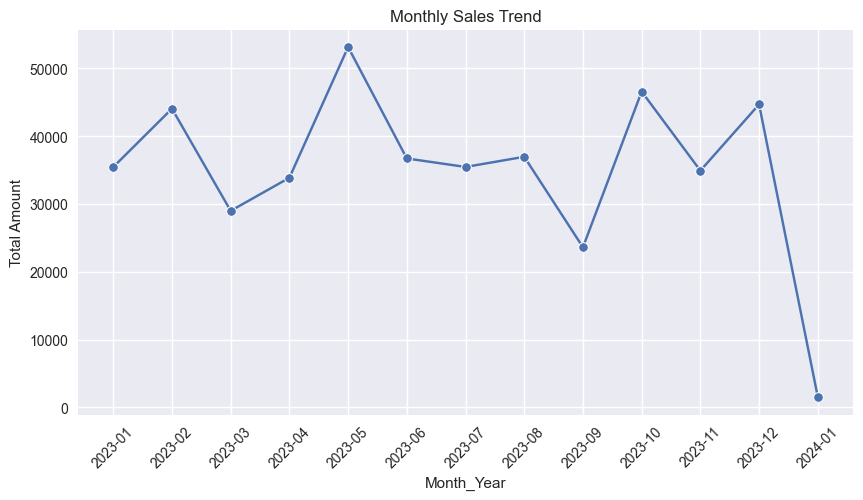

In [4]:

# Monthly Sales Trend 
monthly_sales = (
    df.groupby("Month_Year")["Total Amount"].sum().reset_index().sort_values("Month_Year")
)

plt.figure(figsize=(10,5))
sns.lineplot(x="Month_Year", y="Total Amount", data=monthly_sales, marker="o")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.show()


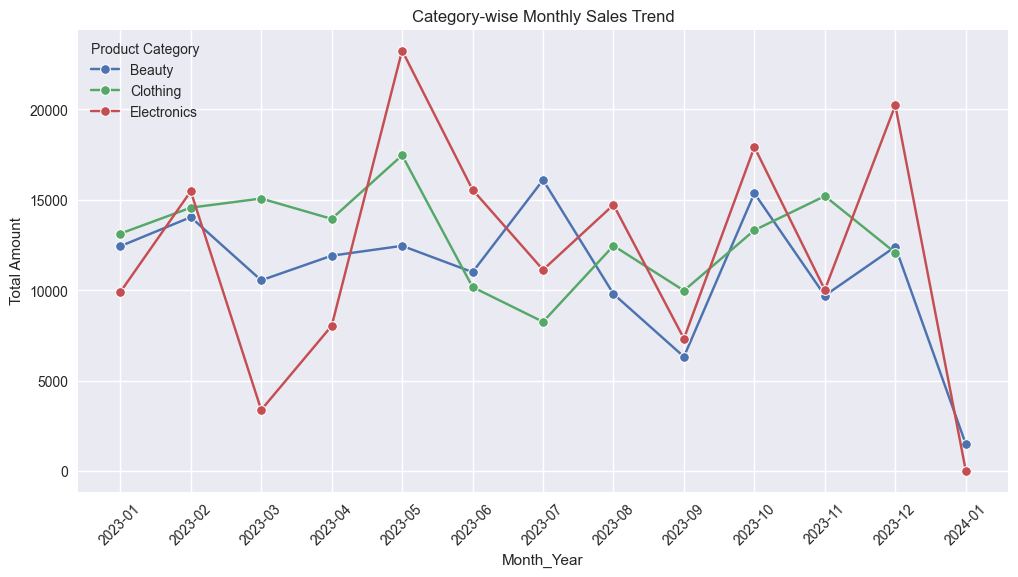

In [5]:

#Category-wise Monthly Trend
monthly_category = (
    df.groupby(["Month_Year", "Product Category"])["Total Amount"].sum().reset_index()
)

plt.figure(figsize=(12,6))
sns.lineplot(x="Month_Year", y="Total Amount", hue="Product Category", data=monthly_category, marker="o")
plt.title("Category-wise Monthly Sales Trend")
plt.xticks(rotation=45)
plt.show()


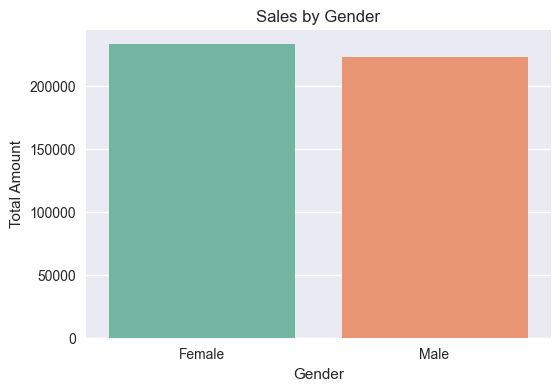

In [6]:

#  Sales by Gender 
gender_sales = df.groupby("Gender")["Total Amount"].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x="Gender", y="Total Amount", data=gender_sales,
            hue="Gender", dodge=False, legend=False, palette="Set2")
plt.title("Sales by Gender")
plt.show()


C:\Users\Stalin S\AppData\Local\Temp\ipykernel_21396\1417240383.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agegroup_sales = df.groupby("Age Group")["Total Amount"].sum().reset_index()


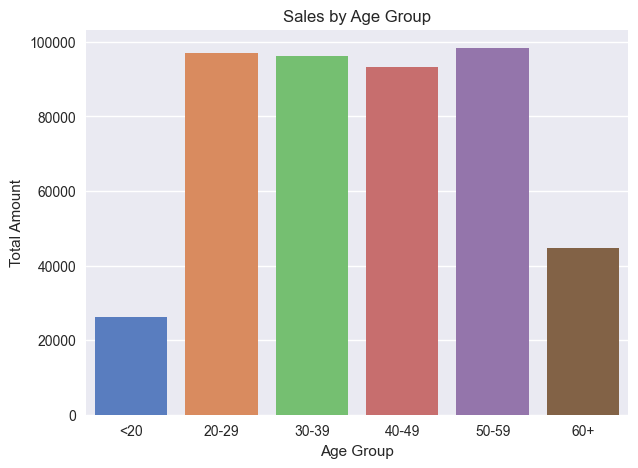

In [7]:

# Sales by Age Group 
agegroup_sales = df.groupby("Age Group")["Total Amount"].sum().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(x="Age Group", y="Total Amount", data=agegroup_sales,
            hue="Age Group", dodge=False, legend=False, palette="muted")
plt.title("Sales by Age Group")
plt.show()


Correlation (Quantity vs Revenue): 0.37370705412140565


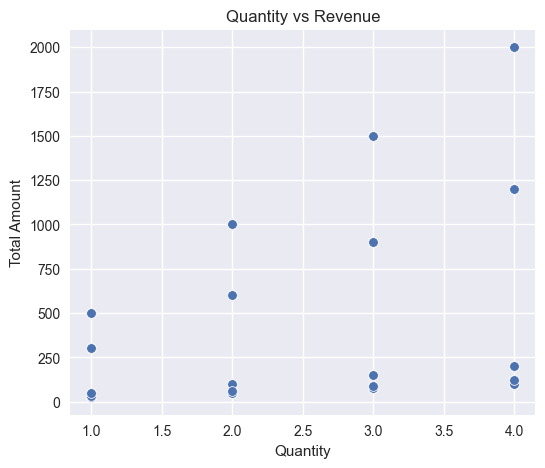

In [8]:

# Quantity vs Revenue
corr = df[["Quantity", "Total Amount"]].corr().iloc[0,1]
print("Correlation (Quantity vs Revenue):", corr)

plt.figure(figsize=(6,5))
sns.scatterplot(x="Quantity", y="Total Amount", data=df)
plt.title("Quantity vs Revenue")
plt.show()


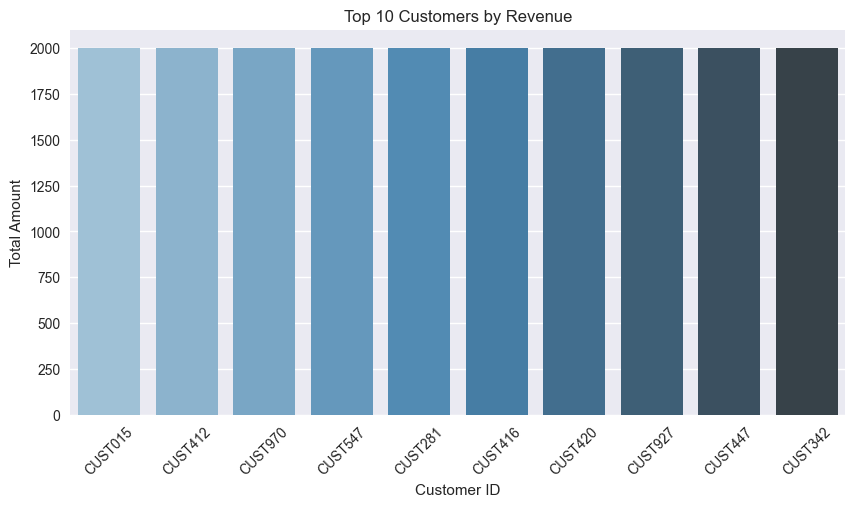

In [9]:

# Top Customers
top_customers = (
    df.groupby("Customer ID")["Total Amount"]
      .sum()
      .reset_index()
      .sort_values("Total Amount", ascending=False)
      .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(x="Customer ID", y="Total Amount", data=top_customers,
            hue="Customer ID", dodge=False, legend=False, palette="Blues_d")
plt.title("Top 10 Customers by Revenue")
plt.xticks(rotation=45)
plt.show()


In [10]:

#  Key Insights 
print("\n=== KEY INSIGHTS ===")

# Top category
top_cat = category_summary.sort_values("total_revenue", ascending=False).iloc[0]
print(f"- Highest revenue category: {top_cat['Product Category']} (${top_cat['total_revenue']:.2f})")

# Peak and lowest month
top_month = monthly_sales.loc[monthly_sales['Total Amount'].idxmax()]
low_month = monthly_sales.loc[monthly_sales['Total Amount'].idxmin()]
print(f"- Peak month: {top_month['Month_Year']} (${top_month['Total Amount']:.2f}); "
      f"Lowest month: {low_month['Month_Year']} (${low_month['Total Amount']:.2f})")

# Gender
top_gender = gender_sales.loc[gender_sales['Total Amount'].idxmax()]
print(f"- Higher spending gender: {top_gender['Gender']} (${top_gender['Total Amount']:.2f})")

# Age group
top_age = agegroup_sales.loc[agegroup_sales['Total Amount'].idxmax()]
print(f"- Top spending age group: {top_age['Age Group']} (${top_age['Total Amount']:.2f})")

# Top customer
top_customer = top_customers.iloc[0]
print(f"- Top customer: {top_customer['Customer ID']} (${top_customer['Total Amount']:.2f})")

print(f"- Quantity vs Revenue correlation: {corr:.3f} "
      f"({'positive' if corr>0 else 'negative' if corr<0 else 'no'}) relationship")



=== KEY INSIGHTS ===
- Highest revenue category: Electronics ($156905.00)
- Peak month: 2023-05 ($53150.00); Lowest month: 2024-01 ($1530.00)
- Higher spending gender: Female ($232840.00)
- Top spending age group: 50-59 ($98340.00)
- Top customer: CUST015 ($2000.00)
- Quantity vs Revenue correlation: 0.374 (positive) relationship
